### Importación de las Librerias

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics

### Carga del Dataset
Datos de entrenamiento y de prueba.

In [23]:

# Nombre las columnas
features = pd.read_csv("features.txt", header=None, delimiter='\s+')
dataFeatures = features.values[:,0]

# Datos de entrenamiento
dataXTrain = pd.read_csv("Train/X_train.txt", sep=" ", header=None)
dataXTrain.columns = dataFeatures
dataXTrain["activity"] = pd.read_csv("Train/y_train.txt", header=None)

#Datos de prueba
dataXTest = pd.read_csv("Test/X_test.txt", sep=" ", header=None)
dataXTest.columns = dataFeatures
dataXTest["activity"] = pd.read_csv("Test/y_test.txt", header=None)

dataframe = pd.concat([dataXTrain, dataXTest])

#mapping activity to activity name
label_name = dataframe["activity"].map({
    1: "WALKING", 
    2: "WALKING_UPSTAIRS", 
    3: "WALKING_DOWNSTAIRS", 
    4: "SITTING", 
    5: "STANDING", 
    6: "LYING",
    7: "STAND_TO_SIT",  
    8: "SIT_TO_STAND",   
    9: "SIT_TO_LIE",     
    10: "LIE_TO_SIT",      
    11: "STAND_TO_LIE",    
    12: "LIE_TO_STAND"
})

dataframe["activity_name"] = label_name

dataframe.head(10)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity,activity_name
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,5,STANDING
6,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,-0.800606,...,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,5,STANDING
7,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,-0.800606,...,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,5,STANDING
8,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,-0.800245,...,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,5,STANDING
9,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,-0.799717,...,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,5,STANDING


Limpieza nombre columnas Dataset

In [24]:
columns = dataframe.columns
columns = columns.str.replace("[()]", '', regex=True) 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

dataframe.columns = columns
dataframe.to_csv("Activities.csv", index = False)
dataframe

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity,activity_name
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104,2,WALKING_UPSTAIRS
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748,2,WALKING_UPSTAIRS
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527,2,WALKING_UPSTAIRS
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865,2,WALKING_UPSTAIRS


Verificación datos nulos en el Dataset

In [25]:
dataframe.isnull().sum()

tBodyAccMean1                0
tBodyAccMean2                0
tBodyAccMean3                0
tBodyAccSTD1                 0
tBodyAccSTD2                 0
                            ..
tXAxisAccAngleWRTGravity1    0
tYAxisAccAngleWRTGravity1    0
tZAxisAccAngleWRTGravity1    0
activity                     0
activity_name                0
Length: 563, dtype: int64

### Analisis Estadistico

In [26]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 3161
Columns: 563 entries, tBodyAccMean1 to activity_name
dtypes: float64(561), int64(1), object(1)
memory usage: 47.0+ MB


In [27]:
dataframe.describe()

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagSkewness1,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity
count,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,...,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,0.039271,-0.000950,-0.018530,-0.602128,-0.633645,-0.697054,-0.627605,-0.656793,-0.745335,-0.359687,...,-0.307343,-0.616570,0.016287,0.019261,0.019060,-0.009669,-0.493295,0.055363,-0.050784,3.932839
std,0.101868,0.100673,0.088223,0.431281,0.365457,0.311368,0.407387,0.346456,0.264000,0.493557,...,0.313980,0.304882,0.330879,0.443168,0.608841,0.484347,0.508506,0.308471,0.266147,2.179758
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.031874,-0.011334,-0.028568,-0.991588,-0.982717,-0.983748,-0.992456,-0.983425,-0.985939,-0.795128,...,-0.540997,-0.839609,-0.108841,-0.257741,-0.474747,-0.389165,-0.816662,-0.035500,-0.130120,2.000000
50%,0.038939,-0.002859,-0.019558,-0.896268,-0.789857,-0.806782,-0.909166,-0.811565,-0.837539,-0.709558,...,-0.343977,-0.701562,0.016339,0.030075,0.012446,-0.009524,-0.711081,0.176461,-0.000182,4.000000
75%,0.043908,0.004553,-0.011525,-0.253824,-0.325816,-0.462371,-0.304344,-0.373108,-0.554729,0.053881,...,-0.124693,-0.488104,0.165890,0.315118,0.526513,0.359450,-0.503817,0.249083,0.105739,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [28]:
print(dataframe.groupby("activity_name").size())

activity_name
LIE_TO_SIT              85
LIE_TO_STAND            84
LYING                 1958
SITTING               1801
SIT_TO_LIE             107
SIT_TO_STAND            33
STANDING              1979
STAND_TO_LIE           139
STAND_TO_SIT            70
WALKING               1722
WALKING_DOWNSTAIRS    1407
WALKING_UPSTAIRS      1544
dtype: int64


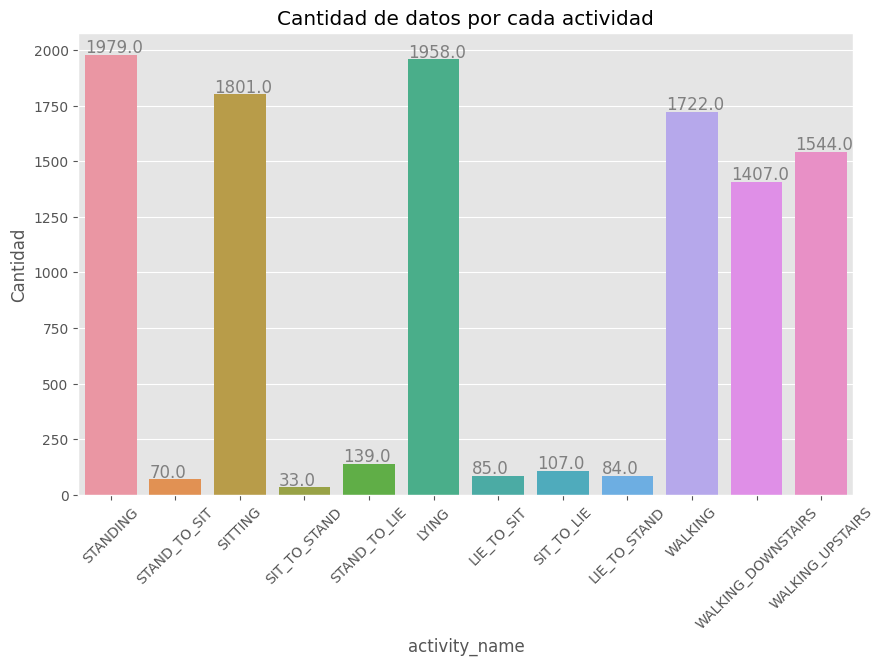

In [29]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "activity_name", data = dataframe)
for i in ax.patches:
    ax.text(x = i.get_x(), y = i.get_height() + 10, s = str(i.get_height()), fontsize = 12, color = "gray")
plt.title("Cantidad de datos por cada actividad")
plt.ylabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

Eliminación de variables que no contienen datos relevantes

In [30]:
not_relevant = ["STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
dataframe_reduced = dataframe[~dataframe["activity_name"].isin(not_relevant)]
dataframe_reduced

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity,activity_name
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104,2,WALKING_UPSTAIRS
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748,2,WALKING_UPSTAIRS
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527,2,WALKING_UPSTAIRS
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865,2,WALKING_UPSTAIRS


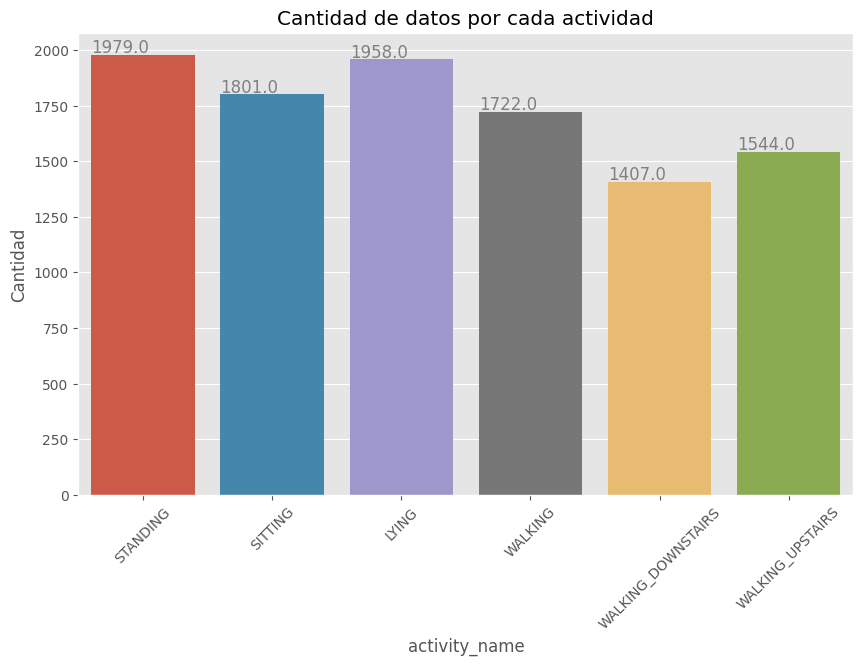

In [31]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "activity_name", data = dataframe_reduced)
for i in ax.patches:
    ax.text(x = i.get_x(), y = i.get_height() + 10, s = str(i.get_height()), fontsize = 12, color = "gray")
plt.title("Cantidad de datos por cada actividad")
plt.ylabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

Histogramas de las variables

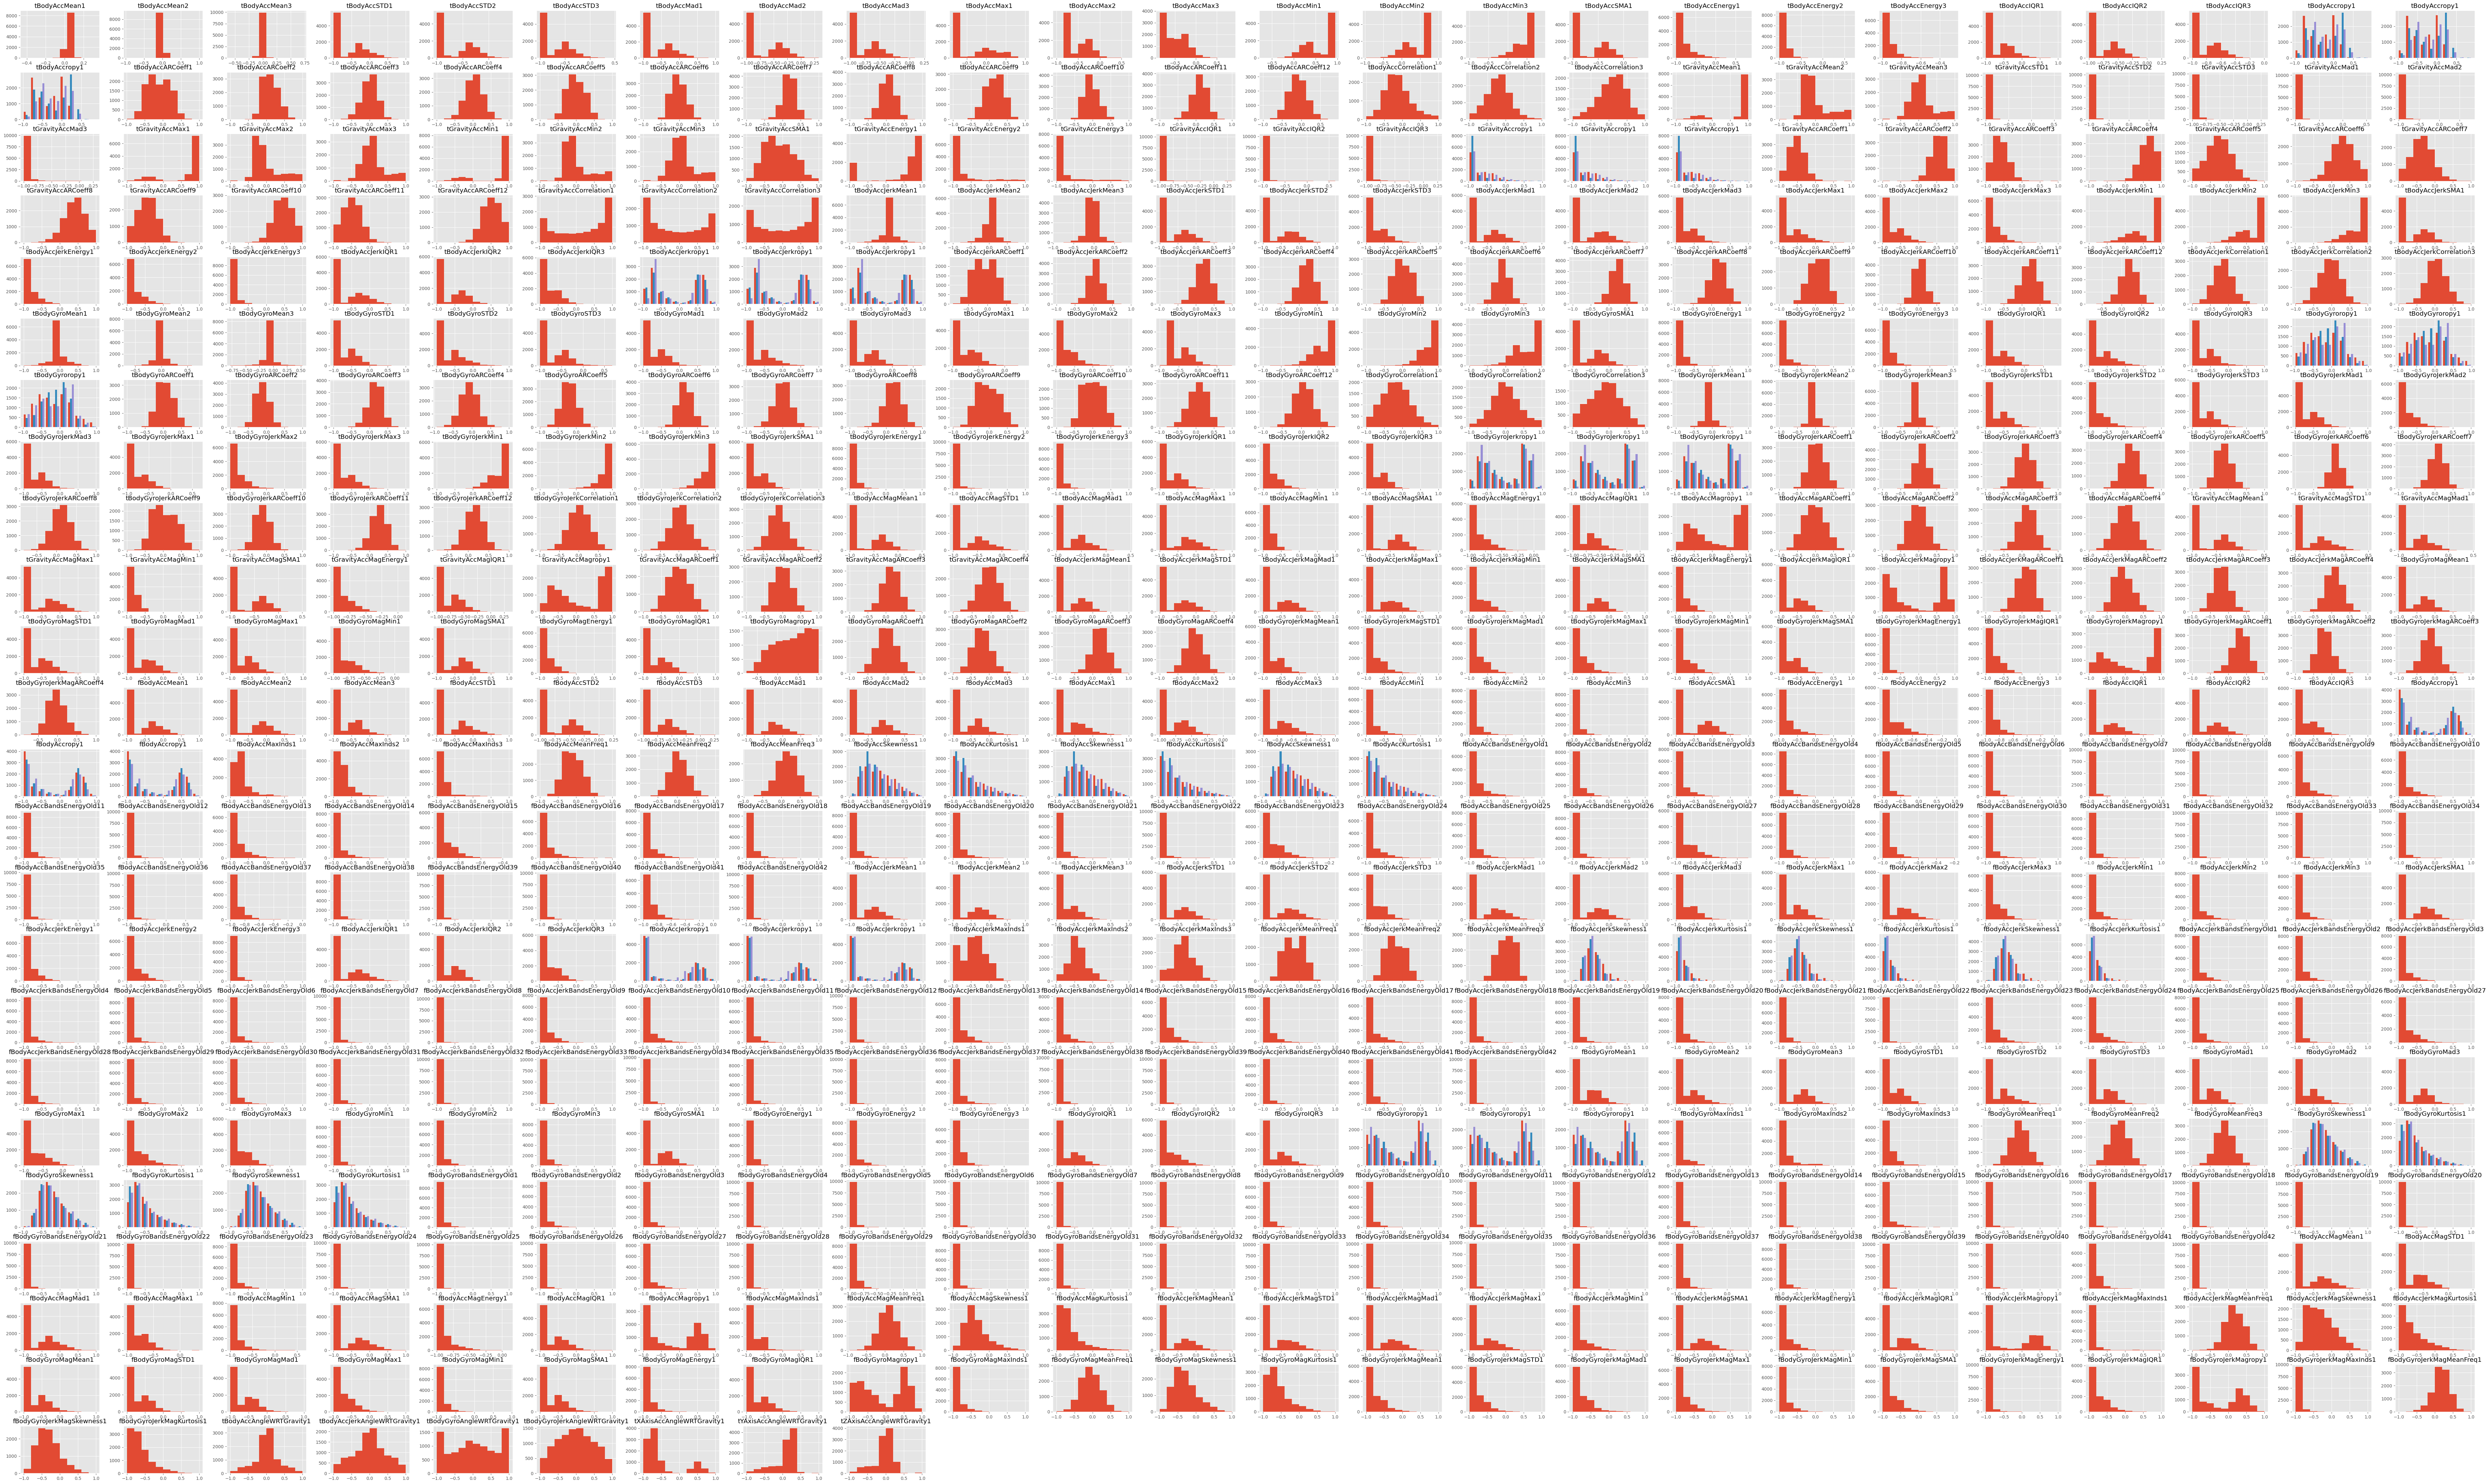

In [32]:
plt.rcParams['figure.figsize'] = (100, 60)
plt.style.use('ggplot')
dataframe_reduced.drop(["activity","activity_name"],axis=1).hist()
plt.show()

Shapiro

In [33]:
# from scipy.stats import normaltest
from scipy.stats import shapiro


normal=[]
no_normal=[]
for current_column in dataframe_reduced.drop(["activity", "activity_name"], axis=1).columns:
  stat,p = shapiro(dataframe_reduced[current_column])
  # stat,p = normaltest(dataframe_reduced[current_column])
  if np.all( p > 0.05):
    normal.append(current_column)
  else:
    no_normal.append(current_column)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",no_normal)

c:\Users\y-o-p\Desktop\11 semestre\inteligentes\parcial\parcial\venv\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Con distribucion normal:  ['tBodyAccARCoeff12', 'tBodyGyroARCoeff4']
Sin distribucion normal:  ['tBodyAccMean1', 'tBodyAccMean2', 'tBodyAccMean3', 'tBodyAccSTD1', 'tBodyAccSTD2', 'tBodyAccSTD3', 'tBodyAccMad1', 'tBodyAccMad2', 'tBodyAccMad3', 'tBodyAccMax1', 'tBodyAccMax2', 'tBodyAccMax3', 'tBodyAccMin1', 'tBodyAccMin2', 'tBodyAccMin3', 'tBodyAccSMA1', 'tBodyAccEnergy1', 'tBodyAccEnergy2', 'tBodyAccEnergy3', 'tBodyAccIQR1', 'tBodyAccIQR2', 'tBodyAccIQR3', 'tBodyAccropy1', 'tBodyAccropy1', 'tBodyAccropy1', 'tBodyAccARCoeff1', 'tBodyAccARCoeff2', 'tBodyAccARCoeff3', 'tBodyAccARCoeff4', 'tBodyAccARCoeff5', 'tBodyAccARCoeff6', 'tBodyAccARCoeff7', 'tBodyAccARCoeff8', 'tBodyAccARCoeff9', 'tBodyAccARCoeff10', 'tBodyAccARCoeff11', 'tBodyAccCorrelation1', 'tBodyAccCorrelation2', 'tBodyAccCorrelation3', 'tGravityAccMean1', 'tGravityAccMean2', 'tGravityAccMean3', 'tGravityAccSTD1', 'tGravityAccSTD2', 'tGravityAccSTD3', 'tGravityAccMad1', 'tGravityAccMad2', 'tGravityAccMad3', 'tGravityAccMax1', 't

Matriz de Correlación

In [34]:
corr_matrix = dataframe_reduced.corr(method='pearson', numeric_only=True)
corr_matrix

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagSkewness1,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity
tBodyAccMean1,1.000000,0.120887,-0.222032,0.002466,-0.016181,-0.034872,0.008006,-0.015678,-0.037151,0.048475,...,-0.016148,-0.012136,-0.543393,0.011364,0.036397,0.031258,-0.046788,0.032136,0.036044,-0.006534
tBodyAccMean2,0.120887,1.000000,-0.031902,-0.046172,-0.046767,-0.051752,-0.045053,-0.046641,-0.052174,-0.039831,...,0.003021,-0.001217,0.075075,-0.025575,0.012886,0.076964,-0.008501,-0.002824,-0.011198,0.037163
tBodyAccMean3,-0.222032,-0.031902,1.000000,-0.021244,-0.021891,-0.012265,-0.019739,-0.020739,-0.005356,-0.037977,...,0.016332,0.016062,0.051602,-0.038583,-0.066700,-0.020542,0.011410,-0.018722,-0.029185,0.043639
tBodyAccSTD1,0.002466,-0.046172,-0.021244,1.000000,0.920501,0.860249,0.998649,0.913938,0.855207,0.980724,...,0.155559,0.125403,-0.035948,-0.020082,0.027030,-0.025004,-0.366280,0.441604,0.387979,-0.727991
tBodyAccSTD2,-0.016181,-0.046767,-0.021891,0.920501,1.000000,0.887395,0.916375,0.997434,0.886377,0.909315,...,0.214679,0.185649,-0.023067,-0.009154,0.001557,-0.015309,-0.375686,0.499209,0.421104,-0.813134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tBodyGyroJerkAngleWRTGravity1,0.031258,0.076964,-0.020542,-0.025004,-0.015309,-0.011089,-0.024714,-0.012528,-0.011592,-0.030088,...,-0.007572,-0.008116,-0.028281,0.010270,-0.116613,1.000000,0.028473,-0.011819,-0.014518,0.014302
tXAxisAccAngleWRTGravity1,-0.046788,-0.008501,0.011410,-0.366280,-0.375686,-0.349045,-0.363214,-0.372517,-0.351442,-0.379094,...,-0.080056,-0.073460,0.011169,0.015681,-0.011670,0.028473,1.000000,-0.745257,-0.636766,0.609501
tYAxisAccAngleWRTGravity1,0.032136,-0.002824,-0.018722,0.441604,0.499209,0.453457,0.437044,0.500872,0.454590,0.452417,...,0.080879,0.068562,-0.002026,-0.010349,-0.002929,-0.011819,-0.745257,1.000000,0.544522,-0.599326
tZAxisAccAngleWRTGravity1,0.036044,-0.011198,-0.029185,0.387979,0.421104,0.479536,0.384313,0.419954,0.475917,0.399764,...,0.058776,0.051765,-0.003779,-0.011743,-0.013591,-0.014518,-0.636766,0.544522,1.000000,-0.531366


In [35]:
def tidy_corr_matrix(corr_matrix):
    corr_matrix = corr_matrix.stack().reset_index()
    corr_matrix.columns = ['variable_1','variable_2','relation']
    corr_matrix = corr_matrix.loc[corr_matrix['variable_1'] != corr_matrix['variable_2'], :]
    corr_matrix['abs_relation'] = np.abs(corr_matrix['relation'])
    corr_matrix = corr_matrix.sort_values('abs_relation', ascending=False)
    
    return(corr_matrix)

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,relation,abs_relation
120469,tGravityAccMagSTD1,tBodyAccMagSTD1,1.000000,1.000000
124973,tGravityAccMagARCoeff1,tBodyAccMagARCoeff1,1.000000,1.000000
126099,tGravityAccMagARCoeff3,tBodyAccMagARCoeff3,1.000000,1.000000
122729,tGravityAccMagSMA1,tGravityAccMagMean1,1.000000,1.000000
114865,tBodyAccMagMin1,tGravityAccMagMin1,1.000000,1.000000
...,...,...,...,...
79322,tBodyGyroIQR3,tBodyAccJerkMean1,-0.000005,0.000005
274,tBodyAccMean1,fBodyAccMax1,0.000004,0.000004
153988,fBodyAccMax1,tBodyAccMean1,0.000004,0.000004
147245,tBodyGyroJerkMagARCoeff2,tBodyAccMean2,-0.000003,0.000003


### Implementación algoritmos
Entrenamiento


In [36]:
X=dataframe_reduced.drop(["activity","activity_name"],axis=1)
y=dataframe_reduced["activity"]

print(X.shape)
print(y.shape)
print("Los valores de y son ",y)

(10411, 561)
(10411,)
Los valores de y son  0       5
1       5
2       5
3       5
4       5
       ..
3157    2
3158    2
3159    2
3160    2
3161    2
Name: activity, Length: 10411, dtype: int64


In [43]:
XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.3,random_state=6)
print(yTrain)

1831    5
3831    5
147     2
2850    3
3047    5
       ..
1172    6
4958    3
2939    3
1063    1
2913    6
Name: activity, Length: 7287, dtype: int64


### Implementación MSV

In [44]:
modelo=SVC()
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accruracy=",metrics.accuracy_score(yTest,yPredict))

Accruracy= 0.9731113956466069


### Metricas
Matriz de Confusión

In [45]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)

[[542   5   0   0   0   0]
 [  1 476   1   0   0   0]
 [  0   4 409   0   0   0]
 [  0   0   0 488  45   1]
 [  0   0   0  27 549   0]
 [  0   0   0   0   0 576]]


In [46]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LYING']
print(classification_report(yTest,yPredict, target_names=target_names))

                    precision    recall  f1-score   support

           WALKING       1.00      0.99      0.99       547
  WALKING_UPSTAIRS       0.98      1.00      0.99       478
WALKING_DOWNSTAIRS       1.00      0.99      0.99       413
           SITTING       0.95      0.91      0.93       534
          STANDING       0.92      0.95      0.94       576
             LYING       1.00      1.00      1.00       576

          accuracy                           0.97      3124
         macro avg       0.97      0.97      0.97      3124
      weighted avg       0.97      0.97      0.97      3124



Prueba kernel rbf

In [47]:
modelo=SVC(kernel='rbf')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
matriz=confusion_matrix(yTest,yPredict)
print(matriz)

Accuracy = 0.9731113956466069
[[542   5   0   0   0   0]
 [  1 476   1   0   0   0]
 [  0   4 409   0   0   0]
 [  0   0   0 488  45   1]
 [  0   0   0  27 549   0]
 [  0   0   0   0   0 576]]


In [48]:
from sklearn.model_selection import cross_val_score
escalar=MinMaxScaler()
X=escalar.fit_transform(X)
print(X.shape)
print(y.shape)
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores)
print("Promedio de puntajes ",scores.mean())

(10411, 561)
(10411,)
[0.94527124 0.92987512 0.97358309 0.96349664 0.96301633]
Promedio de puntajes  0.955048484991028
